In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager,rc
path='malgun.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

### 데이터 확인 및 전처리

In [28]:
file1='./data/팀 경기 승 패 경기 수.xlsx'
file2='./dara/농구 구단 연도별 성적 정리.xlsx'

df1=pd.read_excel(file1)
df2=pd.read_excel(file2)

In [29]:
df1.drop('순위',axis=1,inplace=True)
df1.set_index(keys='연도',inplace=True)

In [30]:
df1.isnull().sum()

팀     0
승     0
패     0
승률    0
dtype: int64

In [31]:
df1.isna().sum()

팀     0
승     0
패     0
승률    0
dtype: int64

In [32]:
df2.drop(index=0,inplace=True)
df2.drop('순위',axis=1,inplace=True)
df2.set_index(keys='연도')

,팀,G,PTS,2P,2PA,2P%,3P,3PA,3P%,FG,...,PPA,PP%,OFF,DEF,TOT,AST,TO,STL,BS,PF
연도,,,,,,,,,,,,,,,,,,,,,
1997.0,대전현대,45.0,96.6,31.4,51.4,61.1,5.9,18.6,31.9,37.4,...,0.0,NaN,11.7,23.9,35.6,16.5,13.9,8.2,4.2,22.8
1997.0,원주나래,45.0,96.2,27.3,48.2,56.7,8.6,24.0,36.1,35.9,...,0.0,NaN,11.5,19.2,30.6,14.5,10.9,11.4,2.2,21.6
1997.0,청주SK,45.0,94.8,29.7,51.5,57.7,7.0,19.8,35.2,36.7,...,0.0,NaN,10.9,21.0,31.9,10.9,11.1,6.9,1.3,21.8
1997.0,수원삼성,45.0,92.1,27.4,48.7,56.3,7.3,19.0,38.5,34.8,...,0.0,NaN,11.0,21.9,32.9,14.0,13.3,7.1,2.7,21.8
1997.0,안양SBS,45.0,91.9,29.1,51.2,56.9,5.5,17.3,31.8,34.6,...,0.0,NaN,11.8,21.0,32.8,12.9,13.9,9.4,4.1,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.0,대구 한국가스공사,54.0,80.0,23.3,43.3,53.7,7.2,22.5,32.2,30.5,...,30.9,58.5,10.2,24.2,34.4,16.9,11.2,7.1,2.2,20.1
2022.0,전주 KCC,54.0,78.3,21.4,42.4,50.5,7.5,22.1,34.1,28.9,...,29.7,57.1,10.2,24.8,35.0,17.2,10.0,5.4,2.0,16.8
2022.0,원주 DB,54.0,78.1,25.0,48.7,51.3,6.1,19.9,30.8,31.1,...,33.5,58.4,10.9,25.2,36.2,18.1,11.5,6.2,2.5,19.0


In [33]:
df2.isnull().sum()

연도      0
팀       0
G       0
PTS     0
2P      0
2PA     0
2P%     0
3P      0
3PA     0
3P%     0
FG      0
FGA     0
FG%     0
FT      0
FTA     0
FT%     0
PP      0
PPA     0
PP%    90
OFF     0
DEF     0
TOT     0
AST     0
TO      0
STL     0
BS      0
PF      0
dtype: int64

In [34]:
# PP%(페인트존득점)가 NaN값인 부분이 있어서 PP%와 관련있는 PP,PPA,PP% 삭제
df2.drop(['PP','PPA','PP%'],axis=1,inplace=True)

- 농구팀의 팀명이 바뀐 경우, 현재 팀 이름으로 변경

In [35]:
def rename(x):
    if x in ['인천대우증권','인천대우','인천신세기','인천SK','인천전자랜드','대구 한국가스공사']:
        return'대구 한국가스공사'
    
    elif x in ['광주나산','광주 골드뱅크','여수 골드뱅크','여수 코리아텐더','부산KTF','부산KT','수원 KT']:
        return '수원 KT'
    
    elif x in ['수원삼성','서울삼성','서울 삼성']:
        return '서울 삼성'
    
    elif x in ['청주SK','서울SK','서울 SK']:
        return '서울 SK'
    
    elif x in ['안양SBS','안양KT&G','안양한국인삼공사','안양KGC','안양 KGC']:
        return '안양 KGC'
    
    elif x in ['부산기아','울산모비스','울산현대모비스','울산 현대모비스']:
        return '울산 현대모비스'
    
    elif x in ['원주나래','원주삼보','원주TG','원주TG삼보','원주동부','원주DB','원주 DB']:
        return '원주 DB'
    
    elif x in ['대전현대','전주KCC','전주 KCC']:
        return '전주 KCC'
    
    elif x in ['경남LG','창원LG','창원 LG']:
        return '창원 LG'
    
    else:
        return '고양 캐롯'

In [36]:
# df1, df2의 팀이름을 동일하게 바꿔주기

df1['팀 이름']=df1["팀"].apply(rename)
df1.drop(['팀'],axis=1,inplace=True)

df2.insert(1,'팀 이름',df2['팀'].apply(rename))
df2.drop(['팀'],axis=1,inplace=True)

In [37]:
# df1, df2 연도와 팀 이름을 inex로 지정

df1.reset_index(inplace=True)
df1.set_index(['연도','팀 이름'],inplace=True)
df2.set_index(['연도','팀 이름'],inplace=True)

In [38]:
# df1, df2를 한개의 데이터프레임으로 합치기
DF=pd.concat([df1,df2],axis=1)

In [39]:
# DF를 팀이름을 기준으로 정렬
DF.sort_index(level=1,inplace=True)

In [40]:
DF.corr()

,승,패,승률,G,PTS,2P,2PA,2P%,3P,3PA,...,FTA,FT%,OFF,DEF,TOT,AST,TO,STL,BS,PF
승,1.000000,-0.882833,0.968047,0.242784,0.211982,0.164379,0.005815,0.321593,0.039791,-0.079089,...,0.089339,0.163853,0.008749,0.336750,0.230207,0.335262,-0.115106,0.084876,0.373410,-0.320019
패,-0.882833,1.000000,-0.967846,0.241297,-0.411297,-0.334616,-0.127715,-0.455762,-0.051494,0.060828,...,-0.269231,-0.092198,-0.128405,-0.409868,-0.337300,-0.283684,0.006328,-0.213073,-0.380208,0.250160
승률,0.968047,-0.967846,1.000000,0.001180,0.323806,0.257726,0.067835,0.402553,0.048851,-0.070193,...,0.185464,0.139532,0.072910,0.390996,0.297713,0.326352,-0.053648,0.160422,0.393184,-0.289995
G,0.242784,0.241297,0.001180,1.000000,-0.411493,-0.351473,-0.251765,-0.276855,-0.024139,-0.037777,...,-0.371476,0.148123,-0.247128,-0.150751,-0.221006,0.106793,-0.224759,-0.264709,-0.013745,-0.144536
PTS,0.211982,-0.411297,0.323806,-0.411493,1.000000,0.734397,0.433424,0.759909,0.317027,0.181395,...,0.515782,0.104958,0.181033,0.282779,0.277348,0.408649,0.306082,0.354663,0.264523,0.175948
2P,0.164379,-0.334616,0.257726,-0.351473,0.734397,1.000000,0.854300,0.658241,-0.348560,-0.408393,...,0.368799,-0.090733,0.224784,0.227526,0.262414,0.277975,0.303056,0.290160,0.281926,0.092409
2PA,0.005815,-0.127715,0.067835,-0.251765,0.433424,0.854300,1.000000,0.173237,-0.496146,-0.462721,...,0.135689,-0.206208,0.468692,0.275669,0.413650,0.127192,0.088055,0.217567,0.147395,-0.056460
2P%,0.321593,-0.455762,0.402553,-0.276855,0.759909,0.658241,0.173237,1.000000,0.050840,-0.111639,...,0.502351,0.124915,-0.255704,0.040341,-0.097513,0.349392,0.448211,0.230882,0.329554,0.247770
3P,0.039791,-0.051494,0.048851,-0.024139,0.317027,-0.348560,-0.496146,0.050840,1.000000,0.932833,...,-0.144337,0.119945,0.049055,0.187083,0.147760,0.297928,-0.116536,0.078834,-0.031488,-0.063291
3PA,-0.079089,0.060828,-0.070193,-0.037777,0.181395,-0.408393,-0.462721,-0.111639,0.932833,1.000000,...,-0.254047,0.027145,0.196289,0.257846,0.267020,0.242103,-0.221656,0.055658,-0.105444,-0.145067


In [41]:
DF

,,승,패,승률,G,PTS,2P,2PA,2P%,3P,3PA,...,FTA,FT%,OFF,DEF,TOT,AST,TO,STL,BS,PF
연도,팀 이름,,,,,,,,,,,,,,,,,,,,,
1997,고양 캐롯,23,22,0.511,45.0,91.0,26.3,44.5,59.1,7.8,21.5,...,21.5,69.7,11.2,23.1,34.2,13.2,14.1,7.3,2.7,21.0
1998,고양 캐롯,3,42,0.067,45.0,74.6,22.8,45.4,50.2,5.8,19.9,...,17.6,65.6,9.5,20.0,29.5,11.3,12.8,7.8,1.6,20.5
1999,고양 캐롯,20,25,0.444,45.0,86.9,24.2,44.0,55.1,7.9,22.6,...,21.0,70.5,10.8,23.0,33.8,17.5,12.7,7.4,2.7,21.1
2000,고양 캐롯,9,36,0.200,45.0,89.4,26.2,46.8,55.9,8.4,23.6,...,18.6,64.0,11.2,22.8,34.0,17.9,13.3,7.0,3.3,22.0
2001,고양 캐롯,36,18,0.667,54.0,87.5,27.2,46.8,58.1,7.0,20.0,...,16.7,71.6,9.6,24.9,34.6,18.9,14.4,8.5,4.4,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,창원 LG,30,24,0.556,54.0,85.8,25.6,49.6,51.5,6.8,20.9,...,21.7,66.1,13.7,25.6,39.4,17.1,11.2,7.5,2.6,19.4
2019,창원 LG,16,26,0.381,42.0,72.6,18.9,39.9,47.3,7.5,23.8,...,17.0,72.1,11.1,24.1,35.2,14.8,10.7,5.4,2.3,19.0
2020,창원 LG,19,35,0.352,54.0,78.4,19.0,40.7,46.7,9.0,26.4,...,17.0,78.9,10.9,22.7,33.6,16.6,10.9,7.1,1.8,18.6


### 전체팀의 지표

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


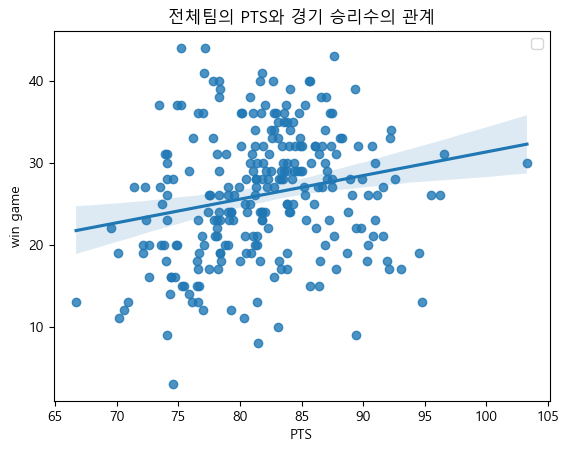

In [42]:
# 전체팀의 총득점(PTS)와 승리 경기수의 관계

DF=DF.rename(columns={'승':'win game'})

sns.regplot(data=DF,x='PTS',y='win game')
plt.title('전체팀의 PTS와 경기 승리수의 관계')
plt.legend()


In [43]:
# DF를 reset_index한 것
DF1=DF.reset_index()
DF1

,연도,팀 이름,win game,패,승률,G,PTS,2P,2PA,2P%,...,FTA,FT%,OFF,DEF,TOT,AST,TO,STL,BS,PF
0,1997,고양 캐롯,23,22,0.511,45.0,91.0,26.3,44.5,59.1,...,21.5,69.7,11.2,23.1,34.2,13.2,14.1,7.3,2.7,21.0
1,1998,고양 캐롯,3,42,0.067,45.0,74.6,22.8,45.4,50.2,...,17.6,65.6,9.5,20.0,29.5,11.3,12.8,7.8,1.6,20.5
2,1999,고양 캐롯,20,25,0.444,45.0,86.9,24.2,44.0,55.1,...,21.0,70.5,10.8,23.0,33.8,17.5,12.7,7.4,2.7,21.1
3,2000,고양 캐롯,9,36,0.200,45.0,89.4,26.2,46.8,55.9,...,18.6,64.0,11.2,22.8,34.0,17.9,13.3,7.0,3.3,22.0
4,2001,고양 캐롯,36,18,0.667,54.0,87.5,27.2,46.8,58.1,...,16.7,71.6,9.6,24.9,34.6,18.9,14.4,8.5,4.4,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2018,창원 LG,30,24,0.556,54.0,85.8,25.6,49.6,51.5,...,21.7,66.1,13.7,25.6,39.4,17.1,11.2,7.5,2.6,19.4
256,2019,창원 LG,16,26,0.381,42.0,72.6,18.9,39.9,47.3,...,17.0,72.1,11.1,24.1,35.2,14.8,10.7,5.4,2.3,19.0
257,2020,창원 LG,19,35,0.352,54.0,78.4,19.0,40.7,46.7,...,17.0,78.9,10.9,22.7,33.6,16.6,10.9,7.1,1.8,18.6
258,2021,창원 LG,24,30,0.444,54.0,77.4,21.9,44.4,49.2,...,16.7,64.4,13.4,22.9,36.3,16.0,9.7,7.5,1.8,19.8


Text(0.5, 1.0, 'BS와 PTS의 관계')

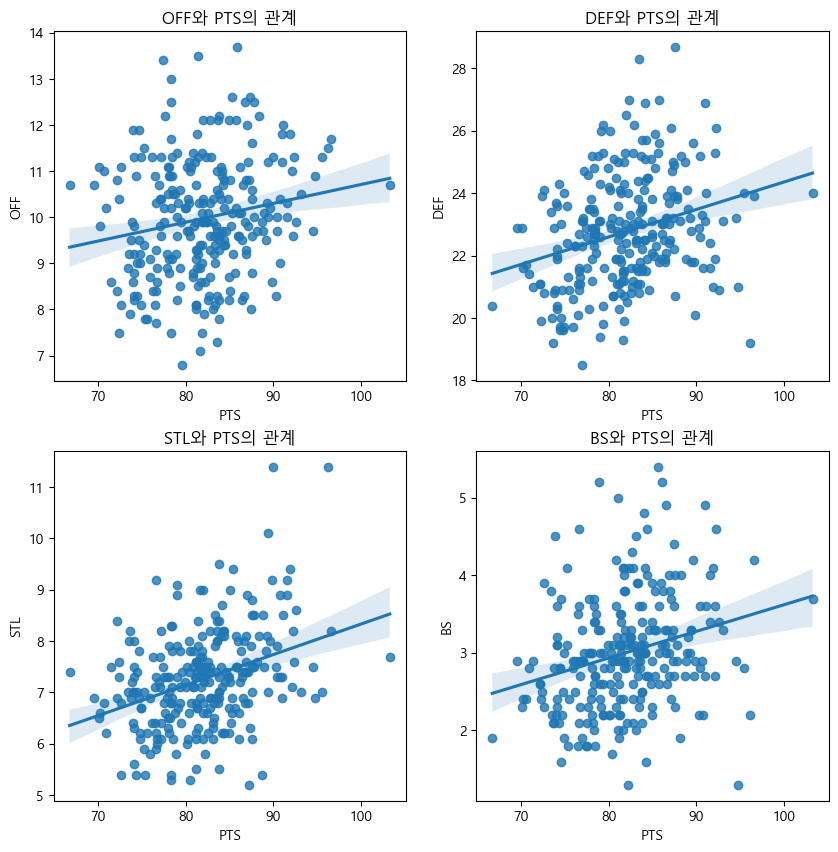

In [45]:
# 전체팀의 총득점(PTS)과 오펜스리바운드(OFF), 디펜스리바운드(DEF), 스틸(STL), 블록(BS)과의 상관관계 그래프

fig1=plt.figure(figsize=(10,10))
ax1=fig1.add_subplot(2,2,1)
ax2=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)

sns.regplot(data=DF1,x='PTS',y='OFF',ax=ax1)
sns.regplot(data=DF,x='PTS',y='DEF',ax=ax2)
sns.regplot(data=DF,x='PTS',y='STL',ax=ax3)
sns.regplot(data=DF,x='PTS',y='BS',ax=ax4)

ax1.set_title("OFF와 PTS의 관계")
ax2.set_title("DEF와 PTS의 관계")
ax3.set_title("STL와 PTS의 관계")
ax4.set_title("BS와 PTS의 관계")



### 서울 삼성팀의 지표

(50.0, 87.0)

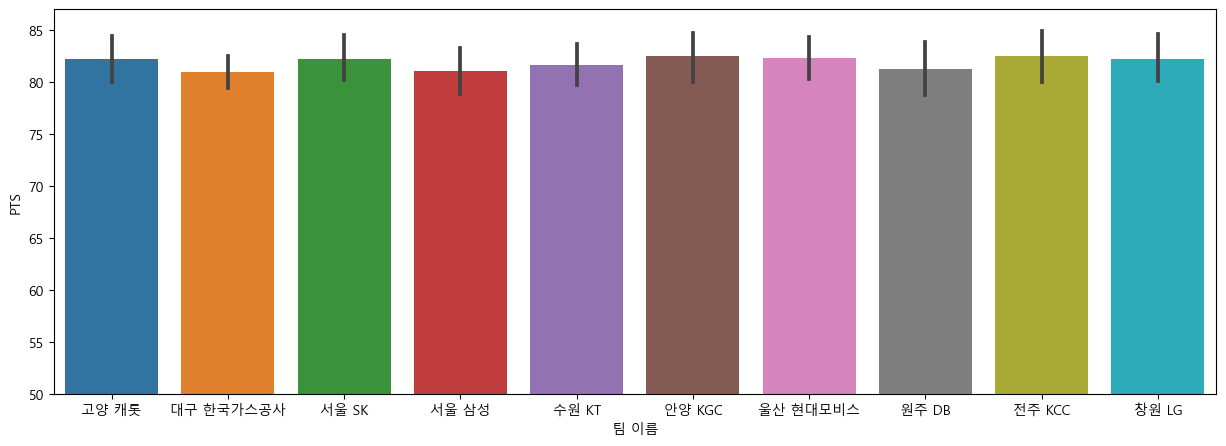

In [46]:
# 전체와 서울삼성
fig=plt.figure(figsize=(15,5))
sns.barplot(data=DF1,x='팀 이름',y='PTS')
plt.ylim(50,87)

In [47]:
# 서울 삼성팀 분리
DFSS=DF.xs('서울 삼성',level='팀 이름')

In [48]:
DFSS

,win game,패,승률,G,PTS,2P,2PA,2P%,3P,3PA,...,FTA,FT%,OFF,DEF,TOT,AST,TO,STL,BS,PF
연도,,,,,,,,,,,,,,,,,,,,,
1997,17,28,0.378,45.0,92.1,27.4,48.7,56.3,7.3,19.0,...,22.8,66.7,11.0,21.9,32.9,14.0,13.3,7.1,2.7,21.8
1998,25,20,0.556,45.0,84.3,23.4,42.1,55.5,7.3,21.8,...,21.2,74.5,9.5,21.5,31.0,15.9,13.2,8.2,1.6,21.6
1999,23,22,0.511,45.0,85.4,24.5,44.3,55.2,7.0,19.6,...,20.7,75.1,9.2,22.3,31.5,15.5,11.8,9.4,3.3,22.1
2000,34,11,0.756,45.0,92.3,29.5,51.2,57.6,6.5,17.7,...,20.4,68.1,11.3,26.1,37.4,21.0,12.3,7.6,4.6,21.3
2001,24,30,0.444,54.0,81.8,25.0,46.3,53.9,7.3,21.1,...,14.6,68.7,9.4,22.8,32.2,18.6,12.0,7.7,4.0,20.3
2002,28,26,0.519,54.0,81.3,27.3,50.3,54.2,5.4,16.9,...,15.7,67.2,11.8,24.1,35.9,17.5,12.4,6.7,3.5,19.0
2003,28,26,0.519,54.0,83.3,25.6,46.6,55.0,6.4,18.4,...,17.2,74.1,9.4,24.4,33.9,18.2,13.4,6.9,3.9,20.1
2004,27,27,0.500,54.0,87.5,26.5,48.2,55.0,7.1,20.4,...,17.4,75.6,10.6,23.9,34.5,19.2,11.5,7.0,2.7,19.6
2005,32,22,0.593,54.0,86.7,26.3,46.1,57.1,6.6,18.4,...,18.4,77.1,9.9,23.9,33.9,20.1,12.9,6.8,2.6,18.5


In [49]:
# 서울 삼성팀의 corr()
DFSS.corr()

,win game,패,승률,G,PTS,2P,2PA,2P%,3P,3PA,...,FTA,FT%,OFF,DEF,TOT,AST,TO,STL,BS,PF
win game,1.000000,-0.887815,0.965276,0.009039,0.589554,0.629246,0.265542,0.704828,-0.104556,-0.449047,...,0.311168,0.343467,-0.057320,0.251048,0.118070,0.754396,0.269639,0.280714,0.330518,-0.021338
패,-0.887815,1.000000,-0.973599,0.452156,-0.721187,-0.636463,-0.224991,-0.756347,-0.106391,0.261008,...,-0.483528,-0.229970,0.027751,-0.228529,-0.119860,-0.611981,-0.215727,-0.496870,-0.333351,-0.086742
승률,0.965276,-0.973599,1.000000,-0.244658,0.674986,0.656423,0.262841,0.745022,-0.002673,-0.361723,...,0.409969,0.277940,-0.032144,0.270067,0.142196,0.709961,0.238952,0.401114,0.361008,0.043906
G,0.009039,0.452156,-0.244658,1.000000,-0.424405,-0.163381,0.025785,-0.277384,-0.433818,-0.303183,...,-0.447555,0.165994,-0.050795,-0.009998,-0.031604,0.132376,0.053852,-0.535572,-0.083737,-0.229835
PTS,0.589554,-0.721187,0.674986,-0.424405,1.000000,0.790713,0.383998,0.805753,0.341929,-0.067336,...,0.744396,0.038325,0.078427,0.291832,0.219197,0.509351,0.172559,0.282037,0.318610,0.124513
2P,0.629246,-0.636463,0.656423,-0.163381,0.790713,1.000000,0.800337,0.607575,-0.209087,-0.500811,...,0.362415,-0.206644,0.331759,0.475169,0.466616,0.530804,0.137937,0.119012,0.454308,-0.108355
2PA,0.265542,-0.224991,0.262841,0.025785,0.383998,0.800337,1.000000,0.011294,-0.414267,-0.439470,...,-0.055604,-0.488825,0.689332,0.610717,0.744786,0.232464,-0.215185,-0.110049,0.378474,-0.309181
2P%,0.704828,-0.756347,0.745022,-0.277384,0.805753,0.607575,0.011294,1.000000,0.180854,-0.268261,...,0.682878,0.317286,-0.353577,-0.025392,-0.209521,0.583626,0.531095,0.327548,0.245349,0.231264
3P,-0.104556,-0.106391,-0.002673,-0.433818,0.341929,-0.209087,-0.414267,0.180854,1.000000,0.849871,...,0.289386,0.077657,-0.203391,-0.067834,-0.152808,0.034237,-0.247890,0.255699,0.029850,0.115514
3PA,-0.449047,0.261008,-0.361723,-0.303183,-0.067336,-0.500811,-0.439470,-0.268261,0.849871,1.000000,...,-0.041307,-0.042828,0.012641,-0.032934,-0.012798,-0.191007,-0.442960,0.051978,-0.106157,-0.051578


[(65.0, 100.0)]

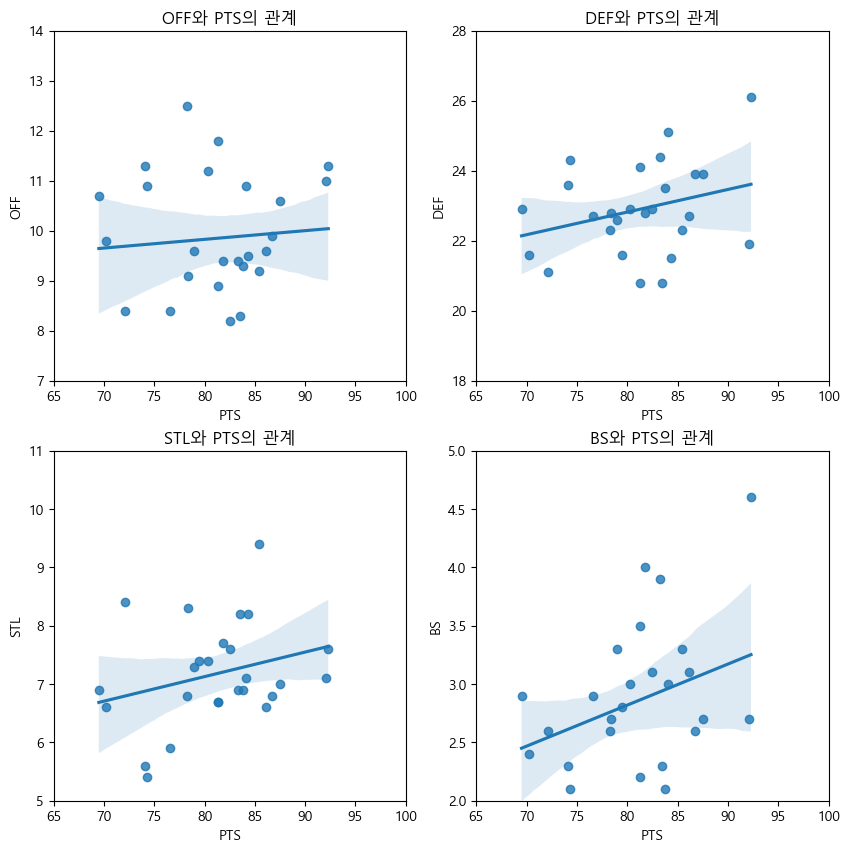

In [50]:
# 서울 삼성팀의 지표에 대해서....
# 서울 삼성팀의 승률 대비 OFF DEF STL BS 관계 

fig2=plt.figure(figsize=(10,10))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)

sns.regplot(data=DFSS,x='PTS',y='OFF',ax=ax1)
sns.regplot(data=DFSS,x='PTS',y='DEF',ax=ax2)
sns.regplot(data=DFSS,x='PTS',y='STL',ax=ax3)
sns.regplot(data=DFSS,x='PTS',y='BS',ax=ax4)

ax1.set_title("OFF와 PTS의 관계")
ax2.set_title("DEF와 PTS의 관계")
ax3.set_title("STL와 PTS의 관계")
ax4.set_title("BS와 PTS의 관계")

ax1.set(ylim=(7,14))
ax2.set(ylim=(18,28))
ax3.set(ylim=(5,11))
ax4.set(ylim=(2,5))

ax1.set(xlim=(65,100))
ax2.set(xlim=(65,100))
ax3.set(xlim=(65,100))
ax4.set(xlim=(65,100))